<p>
    <img src=https://github.com/ladata-ufs/IX-SEMAC/blob/main/id%20visual/logotipo-extenso-fundo-cinza.png?raw=true alt=ladata width=400/>
</p>

# **Ciência de Dados para Sistemas Embarcados: Dos Sensores análises**


#### **Objetivos**: Este projeto, visa explicitar como a Ciência de Dados pode estar diretamente ligada ao uso de Sistemas Embarcados. Para isso foram utilizados os seguintes materiais para a realização do mesmo:

*   Arduino UNO
*   DHT11 Humidity and Temperature sensor
*   Jumpers






#### ✅ **Coletando os dados:**

Para fazer a coleta dos dados do sensor, utilizaremos o seguinte código no arduino

In [ ]:
#include "dht.h" //INCLUSÃO DE BIBLIOTECA

#define pinoDHT11 A2//PINO ANALÓGICO UTILIZADO PELO DHT11

dht DHT; //VARIÁVEL DO TIPO DHT

void setup(){
  Serial.begin(9600); //INICIALIZA A SERIAL
  delay(2000); //INTERVALO DE 2 SEGUNDO ANTES DE INICIAR
}

void loop(){
  DHT.read11(pinoDHT11); //LÊ AS INFORMAÇÕES DO SENSOR
  Serial.print(DHT.humidity, 0); //IMPRIME NA SERIAL O VALOR DE UMIDADE MEDIDO
  Seriel.print(",");
  Serial.println(DHT.temperature, 0); //IMPRIME NA SERIAL O VALOR DE UMIDADE MEDIDO E REMOVE A PARTE DECIMAL
  delay(2000); //INTERVALO DE 2 SEGUNDOS * NÃO DIMINUIR ESSE VALOR
}

#### ⏏ **Recebendo os dados:**

Após o código do arduino, é necessário um código para receber esses dados para o computador. Assim, será utilizado um código em python para receber os dados por comunicação serial

#### 🔽 **Bibliotecas Utilizadas:**

Para esse projeto, as principais bibliotecas necessárias foram: [PySerial](https://pythonhosted.org/pyserial/), [Pandas](https://pandas.pydata.org) e [Time](https://docs.python.org/3/library/time.html)

In [ ]:
# Importação das bibliotecas utilizadas
import serial as ard
import pandas as pd
import time

#### ⛽ **Definindo funções:**

Definição de funções que serão utilizadas para ler os dados

In [ ]:
def read_data(temperatura, umidade):
    global arduino
    dados = arduino.readline().decode('utf-8').strip().split(',')
    dados_umidade = dados[0]
    dados_temperatura = dados[1]
    print(f"Dados recebidos: {dados_umidade}, {dados_temperatura}")
    umidade.append(dados_umidade)
    temperatura.append(dados_temperatura)

#### ▶ **Inicializando variáveis:**

Inicializando as variáveis que serão utilizadas, sendo elas as listas que armazenarão os valores lidos pelo sensor, a variável de contador e de valor máximo para controlar o número de vezes que os dados serão lidos em cada lista

In [ ]:
# Conecta ao serial pela porta utilizada pelo arduino
arduino = ard.Serial('COM9', 9600) # Alterar para o relativo ao seu computador

contador = 1 # contador para controlar o número de leituras
MAX_VALUE = 150 # número máximo de leituras dos dados
# listas que armazenarão os valores lidos, relativos para cada volume de água
lista_temperatura = []
lista_umidade = []

#### 🔄 **Recebendo os dados:**

O código que receberá e armazenará os valores lidos pelo **sensor**

In [ ]:
# Leitura de dados, com o volume de 50mL
while contador <= MAX_VALUE:
    read_data(lista_temperatura, lista_umidade)
    contador += 1

#### ❗ **Exportando os dados:**

O código responsável por criar o dataframe a partir das listas com os dados e exportar este para um csv, possibilitando a futura análise

In [ ]:
# Cria o dataframe utilizando as listas, para que possamos analisar esses dados
df = pd.DataFrame({'Temperatura': lista_temperatura, 'Umidade': lista_umidade})
# Exporta para csv o arquivo gerado com os dados
df.to_csv('dados_arduino.csv', index=False)

print(df)

#### 🔽 **Bibliotecas Utilizadas:**

Para esse projeto, as principais bibliotecas necessárias foram: [Pandas](https://pandas.pydata.org), [NumPy](https://numpy.org), [MatplotLib](https://matplotlib.org) e [Seaborn](https://seaborn.pydata.org/)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 🛠 **Tratamento**

Responsável pela parte da importação, limpeza e geração de objetos de análise.

In [ ]:
bd = pd.read_csv('/content/dados_arduino.csv')
bd = bd.dropna()

### 🤔 **Análise e Metodologia**

Análise dos dados limpos para a análise com o objetivo de entender melhor como estava o ambiente de teste

A **Metodologia** é baseada em: gerar gráficos para visualizar o comportamento da mudança de temperatura e umidade , ou , criar um modelo que possibilite prever os possíveis problemas de ambientes que precisam de monitoramento

In [ ]:
def get_extremes(bd):
    max = bd.max()
    min = bd.min()
    return max, min

def get_medians(bd):
    mean = bd.mean()
    median = bd.median()
    return mean, median

def get_stds(bd):
    std = bd.std()
    return std

### 📈 **Resultados**

Obtendo os dados, podemos ver como ficou a evolução da temperatura e da umidade em relação ao tempo e também ver como esses dados se repetem

In [ ]:
temps = bd['Temperatura']
umids = bd['Umidade']

max_temp, min_temp = get_extremes(temps)
max_umid, min_umid = get_extremes(umids)

mean_temp, median_temp = get_medians(temps)
mean_umid, median_umid = get_medians(umids)

std_temp = get_stds(temps)
std_umid = get_stds(umids)

print(f"Temperatura máxima: {max_temp}")
print(f"Temperatura mínima: {min_temp}")

print(f"Umidade máxima: {max_umid}")
print(f"Umidade mínima: {min_umid}")

print(f"Temperatura média: {mean_temp:.2f}")
print(f"Temperatura mediana: {median_temp:.2f}")

print(f"Umidade média: {mean_umid:.2f}")
print(f"Umidade mediana: {median_umid:.2f}")

Temperatura máxima: 28
Temperatura mínima: 25
Umidade máxima: 45
Umidade mínima: 35
Temperatura média: 26.70
Temperatura mediana: 27.00
Umidade média: 40.80
Umidade mediana: 43.00


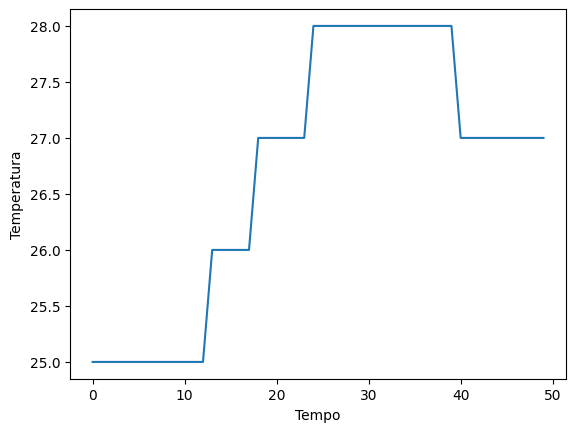

In [ ]:
show = sns.lineplot(data=bd, x=bd.index, y='Temperatura')
show.set(xlabel='Tempo')
plt.show()

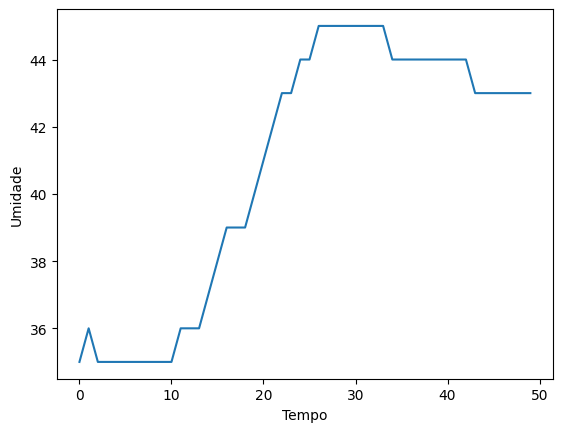

In [ ]:
show = sns.lineplot(data=bd, x=bd.index, y='Umidade')
show.set(xlabel='Tempo')
plt.show()

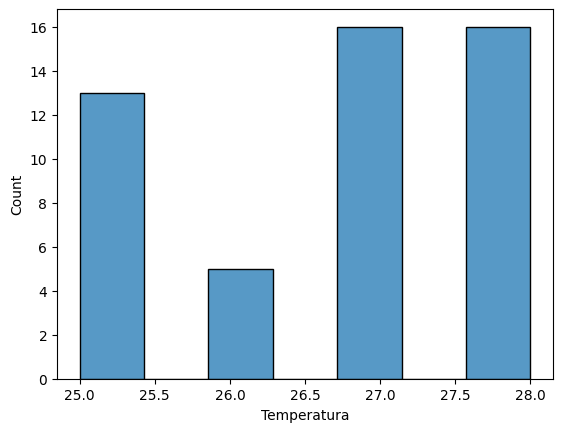

In [ ]:
# Plot do gráfico importante
sns.histplot(data=bd, x='Temperatura')
plt.show()

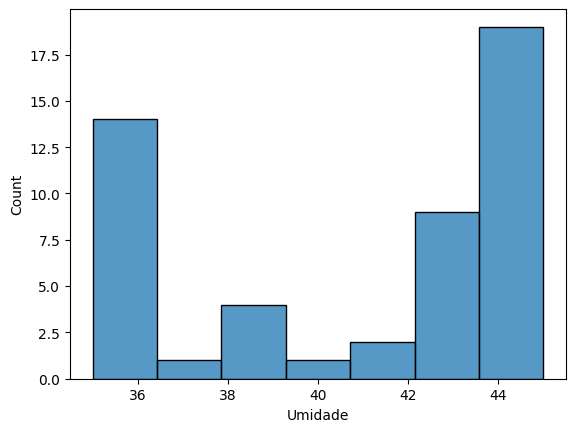

In [ ]:
sns.histplot(data=bd, x='Umidade')
plt.show()

### 💡 **Conclusões**

A partir da pesquisa e do desenvolvimento do código acima, o objetivo de monitorar um ambiente controlado foi alcançado.

### 📖 **Referências**



### **Equipe**

1. [Cauan Machado](https://github.com/cteimachDCOMP)
2. [Gustavo Caldas](https://github.com/Gugu-debug)
3. [Lucas Feitosa](https://github.com/LucasFe3152)
4. [Michael Santos](https://github.com/ievykiw)
5. [Túlio Gois](https://github.com/tuliosg)